In [42]:
import mxnet as mx
from mxnet import nd , gluon , autograd
import matplotlib.pyplot as plt
%matplotlib inline

In [123]:
def sigmoid(X):
    return 1/(1 + nd.exp(-0.1*X))

In [159]:
x = nd.arange(-100, 100, 0.005, ctx = mx.cpu())
x_val = nd.arange(-2, 2, 0.025, ctx = mx.cpu())

In [160]:
y = sigmoid(x).asnumpy()
Y = [1 if p > 0.5 else 0 for p in y]
y_val = sigmoid(x_val)
Y_val = [1 if p > 0.5 else 0 for p in y_val]

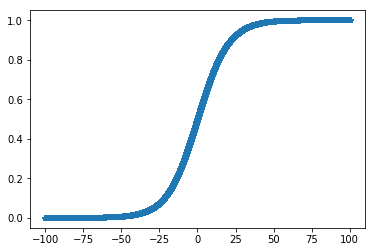

In [161]:
plt.plot(x.asnumpy(), y , "*")

In [162]:
def Loss(y_, y):
    return nd.mean(-(y*nd.log(y_) + (1 - y)*nd.log(1 - y_)))

In [163]:
from sklearn.preprocessing import StandardScaler
scalerX = StandardScaler()
scalerX.fit(x.asnumpy().reshape(-1, 1))
X = nd.array(scalerX.transform(x.asnumpy().reshape(-1, 1)))
X_val = nd.array(scalerX.transform(x_val.asnumpy().reshape(-1, 1)))

In [164]:
batch_size = 250
data = gluon.data.DataLoader(dataset= gluon.data.ArrayDataset(X, Y),  batch_size= batch_size)

In [166]:
def train(epochs , lr , X, Y):
    W = nd.random.normal(0 , 1, shape=(1 ,) ,ctx = mx.cpu())
    W.attach_grad()
    for e in range(epochs):
        total_loss = 0
        X = nd.array(X).as_in_context(mx.cpu())
        Y = nd.array(Y).as_in_context(mx.cpu())
        with autograd.record():
            y_ = sigmoid(nd.dot(X , W))
            loss = Loss(y_, Y)
        loss.backward()
        total_loss += loss.asscalar()
        W -= lr*W.grad
        if e % 1000 == 0:
            print("epoch: {} , loss: {}".format(e , total_loss/(40000/250)))
    return W

In [167]:
W = train(6300 , 0.75 , X, Y)

epoch: 0 , loss: 0.00405142679810524
epoch: 1000 , loss: 0.001625850610435009
epoch: 2000 , loss: 0.0012064754962921142
epoch: 3000 , loss: 0.0010200860910117627
epoch: 4000 , loss: 0.0009093708358705044
epoch: 5000 , loss: 0.0008338029496371746
epoch: 6000 , loss: 0.0007778559811413288


In [168]:
W


[ 38.8047905]
<NDArray 1 @cpu(0)>

In [169]:
def test(X, Y ,W):
    X = nd.array(X).as_in_context(mx.cpu())
    Y = nd.array(Y).as_in_context(mx.cpu())
    y_ = nd.sigmoid(nd.dot(X , W))
    y_ = nd.array([1 if p > 0.5 else 0 for p in y_])
    err = nd.sum(nd.abs((y_ - Y)))/len(Y)
    print("Accuracy: ", (1 - err))
    return list(y_.asnumpy().astype(int))

In [170]:
y_ = test(X_val , Y_val , W)

Accuracy:  
[ 0.99374998]
<NDArray 1 @cpu(0)>
